# Inisialisasi

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [0]:
# !pip install qiskit 

In [0]:
url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'

In [0]:
df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

# Define data (ambil Normal & DoS)

In [0]:
data_primary = data.loc[data['type_attack'].isin(['normal','dos'])]

In [8]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [9]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data_primary.replace(flag_dict, inplace = True)
data_primary.replace(service_dict, inplace = True)
data_primary.replace(protocol_dict, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [10]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
data_all = data_primary.drop(columns=['num_packet', 'type_attack'])

In [0]:
# data_all.drop(columns=['num_packet', 'type_attack'])

In [13]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00


# PCA

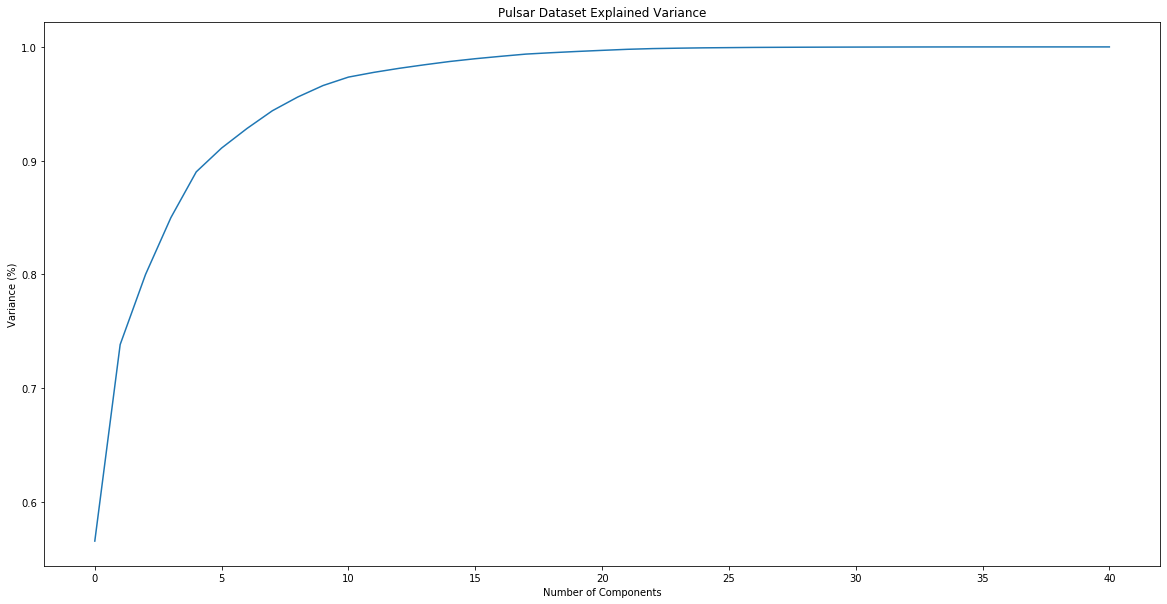

In [14]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [15]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,0.188473,0.444017,0.647420,1.096442,0.016609
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046
2,-1.037544,-0.424769,-0.418469,-0.224333,0.235173
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176


In [16]:
df.shape

(113269, 5)

In [17]:
# PCA 10

pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043726,-0.268809,-0.352872,0.717306
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124778,0.085572,0.030104
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101854,-0.023448
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109201,-0.002123,-0.004497


In [18]:
df.shape

(113269, 10)

In [19]:
# PCA 25

pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321,0.057765,0.098332,-0.007642,0.037965,0.004564
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801,0.019274,0.021144,-0.000202,0.001778,-0.001125
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262,-0.034417,0.005172,0.001963,-0.011584,-0.062690
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352,0.005187,0.002530,-0.001983,0.003487,0.005254
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863,0.011057,0.008376,-0.002506,0.006438,0.012491


In [20]:
df.shape

(113269, 25)

In [21]:
# PCA 41

pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321,0.057765,0.098332,-0.007642,0.037965,0.004564,-0.047922,0.018537,-0.013010,0.000136,0.005116,0.013664,-0.001390,0.001989,-0.001017,0.001911,0.000013,-0.000492,-0.000350,-0.000197,-5.412495e-06,-8.504976e-18
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801,0.019274,0.021144,-0.000202,0.001778,-0.001125,0.001751,0.000585,0.000334,-0.000500,-0.000102,-0.000410,0.000182,0.000088,0.000074,-0.000025,-0.000013,-0.000006,0.000082,0.000004,2.883116e-06,-1.775807e-17
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262,-0.034417,0.005172,0.001963,-0.011584,-0.062690,-0.004625,-0.012721,-0.000497,-0.001053,-0.000423,0.001127,0.000117,-0.000200,-0.000115,0.000689,-0.000071,0.000037,-0.000261,0.000065,1.239931e-06,-4.512433e-17
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352,0.005187,0.002530,-0.001983,0.003487,0.005254,0.000758,-0.001913,0.000031,0.000164,-0.000838,-0.000659,-0.000083,0.000604,-0.000665,-0.000583,0.000113,-0.000051,0.000109,-0.000030,6.752815e-06,-6.182058e-17
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863,0.011057,0.008376,-0.002506,0.006438,0.012491,-0.000561,0.005368,-0.000130,0.002123,0.000359,0.000140,-0.000285,-0.000126,-0.000100,0.000030,0.000005,-0.000033,-0.000096,-0.000014,2.253994e-07,3.882628e-18


In [22]:
df.shape

(113269, 41)

# Feature Selection

In [23]:
data.shape

(125972, 43)

In [24]:
data_primary.shape

(113269, 43)

In [25]:
data_all.shape

(113269, 41)

In [26]:
import tensorflow.compat.v1 as tf